# 01 - Exploratory Data Analysis: Sales Data

## Aurora Utensils Manufacturing (AUM)

This notebook performs comprehensive EDA on Aurora's core sales transaction data.

### Data Source
- **Dataset**: UniTech Sales Data (Kaggle)
- **File**: `data/raw/utensil_sales.csv`
- **Coverage**: 2016-01 to 2020-12 (5 years, 60 months)
- **Rows**: ~365,000 transactions

### Objectives
1. Load and inspect the raw sales data
2. Check data quality (missing values, duplicates, outliers)
3. Aggregate to monthly granularity
4. Explore trends, seasonality, and patterns
5. Identify top products and regions

---

## 1. Setup

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Project imports
import sys
sys.path.insert(0, '../src')
from data.load_data import load_config, load_sales_data
from data.make_features import make_monthly_sales

# Plot settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Ensure output directories exist
os.makedirs('../reports/figures', exist_ok=True)
os.makedirs('../data/interim', exist_ok=True)

print("✓ Setup complete")
print(f"  Pandas version: {pd.__version__}")
print(f"  Analysis date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")

✓ Setup complete
  Pandas version: 1.5.3
  Analysis date: 2025-12-12 03:49


In [2]:
# Load configuration
config = load_config()

print("Configuration loaded:")
print(f"  Sales file: {config['data_paths']['sales_raw']}")
print(f"  Date column: {config['columns']['sales']['date']}")
print(f"  Product column: {config['columns']['sales']['product']}")
print(f"  Quantity column: {config['columns']['sales']['quantity']}")
print(f"  Revenue column: {config['columns']['sales']['revenue']}")
print(f"  Assumed unit price: ₹{config['finance_assumptions']['assumed_unit_price']}")

Configuration loaded:
  Sales file: data/raw/utensil_sales.csv
  Date column: Date of Order
  Product column: Model Name
  Quantity column: sales
  Revenue column: _derived_revenue
  Assumed unit price: ₹250.0


In [3]:
# Load sales data
df_sales = load_sales_data(config)
print(f"\n✓ Sales data loaded: {df_sales.shape[0]:,} rows × {df_sales.shape[1]} columns")
print(f"  Columns: {df_sales.columns.tolist()}")

[load_sales_data] Derived revenue column created: quantity (sales) × unit_price (250.0)

✓ Sales data loaded: 365,220 rows × 10 columns
  Columns: ['Date of Order', 'Store Code', 'Item Code', 'sales', 'Model Name', 'District', 'State', 'Country', 'Year', '_derived_revenue']


---
## 2. Basic Overview

In [4]:
# Column names and types
print("=== COLUMN INFO ===")
print(df_sales.dtypes)
print(f"\nTotal columns: {len(df_sales.columns)}")

=== COLUMN INFO ===
Date of Order       datetime64[ns]
Store Code                   int64
Item Code                    int64
sales                        int64
Model Name                  object
District                    object
State                       object
Country                     object
Year                         int64
_derived_revenue           float64
dtype: object

Total columns: 10


In [5]:
# First few rows
print("=== FIRST 10 ROWS ===")
df_sales.head(10)

=== FIRST 10 ROWS ===


,Date of Order,Store Code,Item Code,sales,Model Name,District,State,Country,Year,_derived_revenue
0,2016-01-01,1,1,13,Hulu_1,Ratnagiri,Maharashtra,India,2016,3250.0
1,2016-01-02,1,1,11,Hulu_1,Ratnagiri,Maharashtra,India,2016,2750.0
2,2016-01-03,1,1,14,Hulu_1,Mumbai City,Maharashtra,India,2016,3500.0
3,2016-01-04,1,1,13,Hulu_1,Aurangabad,Maharashtra,India,2016,3250.0
4,2016-01-05,1,1,10,Hulu_1,Aurangabad,Maharashtra,India,2016,2500.0
5,2016-01-06,1,1,12,Hulu_1,Mumbai Suburban,Maharashtra,India,2016,3000.0
6,2016-01-07,1,1,10,Hulu_1,Mumbai Suburban,Maharashtra,India,2016,2500.0
7,2016-01-08,1,1,9,Hulu_1,Mumbai Suburban,Maharashtra,India,2016,2250.0
8,2016-01-09,1,1,12,Hulu_1,Amravati,Maharashtra,India,2016,3000.0
9,2016-01-10,1,1,9,Hulu_1,Mumbai Suburban,Maharashtra,India,2016,2250.0


In [6]:
# Detailed info
print("=== DATA INFO ===")
df_sales.info()

=== DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365220 entries, 0 to 365219
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date of Order     365220 non-null  datetime64[ns]
 1   Store Code        365220 non-null  int64         
 2   Item Code         365220 non-null  int64         
 3   sales             365220 non-null  int64         
 4   Model Name        365220 non-null  object        
 5   District          365220 non-null  object        
 6   State             365220 non-null  object        
 7   Country           365220 non-null  object        
 8   Year              365220 non-null  int64         
 9   _derived_revenue  365220 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 27.9+ MB


In [7]:
# Statistical summary
print("=== STATISTICAL SUMMARY ===")
df_sales.describe(include='all').T

=== STATISTICAL SUMMARY ===


C:\Users\gnsr4\AppData\Local\Temp\ipykernel_54592\1442571057.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_sales.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date of Order,365220,1827,2016-01-01 00:00:00,200,2016-01-01,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store Code,365220.0,NaN,NaN,NaN,NaT,NaT,5.500246,2.8724,1.0,3.0,6.0,8.0,10.0
Item Code,365220.0,NaN,NaN,NaN,NaT,NaT,10.5,5.766289,1.0,5.75,10.5,15.25,20.0
sales,365220.0,NaN,NaN,NaN,NaT,NaT,53.863282,29.570082,0.0,30.0,49.0,72.0,231.0
Model Name,365220,20,Hulu_1,18261,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
District,365220,25,Mumbai Suburban,63884,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,365220,1,Maharashtra,365220,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,365220,1,India,365220,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,365220.0,NaN,NaN,NaN,NaT,NaT,2017.999014,1.414641,2016.0,2017.0,2018.0,2019.0,2020.0
_derived_revenue,365220.0,NaN,NaN,NaN,NaT,NaT,13465.820601,7392.52061,0.0,7500.0,12250.0,18000.0,57750.0


In [8]:
# Date range
date_col = config['columns']['sales']['date']
print("=== DATE RANGE ===")
print(f"First date: {df_sales[date_col].min()}")
print(f"Last date: {df_sales[date_col].max()}")
print(f"Total days: {(df_sales[date_col].max() - df_sales[date_col].min()).days}")

=== DATE RANGE ===
First date: 2016-01-01 00:00:00
Last date: 2020-12-31 00:00:00
Total days: 1826


In [9]:
# Unique counts
product_col = config['columns']['sales']['product']
region_col = config['columns']['sales']['region_or_customer']

print("=== UNIQUE VALUE COUNTS ===")
print(f"Unique dates: {df_sales[date_col].nunique():,}")
print(f"Unique stores: {df_sales['Store Code'].nunique():,}")
print(f"Unique products (Model Name): {df_sales[product_col].nunique():,}")
print(f"Unique items (Item Code): {df_sales['Item Code'].nunique():,}")
print(f"Unique states: {df_sales[region_col].nunique():,}")
print(f"Unique districts: {df_sales['District'].nunique():,}")
print(f"Years covered: {sorted(df_sales['Year'].unique())}")

=== UNIQUE VALUE COUNTS ===
Unique dates: 1,827
Unique stores: 10
Unique products (Model Name): 20
Unique items (Item Code): 20
Unique states: 1
Unique districts: 25
Years covered: [2016, 2017, 2018, 2019, 2020]


---
## 3. Data Quality Checks

In [10]:
# Missing values
print("=== MISSING VALUES ===")
missing = df_sales.isnull().sum()
missing_pct = (missing / len(df_sales) * 100).round(2)
missing_df = pd.DataFrame({'Missing': missing, 'Percent': missing_pct})
print(missing_df[missing_df['Missing'] > 0] if missing.sum() > 0 else "No missing values found!")
print(f"\nTotal rows with any missing: {df_sales.isnull().any(axis=1).sum():,}")

=== MISSING VALUES ===
No missing values found!

Total rows with any missing: 0


In [11]:
# Duplicate rows
print("=== DUPLICATES ===")
n_dups = df_sales.duplicated().sum()
print(f"Fully duplicate rows: {n_dups:,} ({n_dups/len(df_sales)*100:.2f}%)")

=== DUPLICATES ===
Fully duplicate rows: 0 (0.00%)


In [12]:
# Zero quantity check
qty_col = config['columns']['sales']['quantity']
print("=== QUANTITY SANITY CHECK ===")
print(f"Rows with quantity = 0: {(df_sales[qty_col] == 0).sum():,}")
print(f"Rows with quantity < 0: {(df_sales[qty_col] < 0).sum():,}")
print(f"Quantity range: {df_sales[qty_col].min()} to {df_sales[qty_col].max()}")

=== QUANTITY SANITY CHECK ===
Rows with quantity = 0: 1
Rows with quantity < 0: 0
Quantity range: 0 to 231


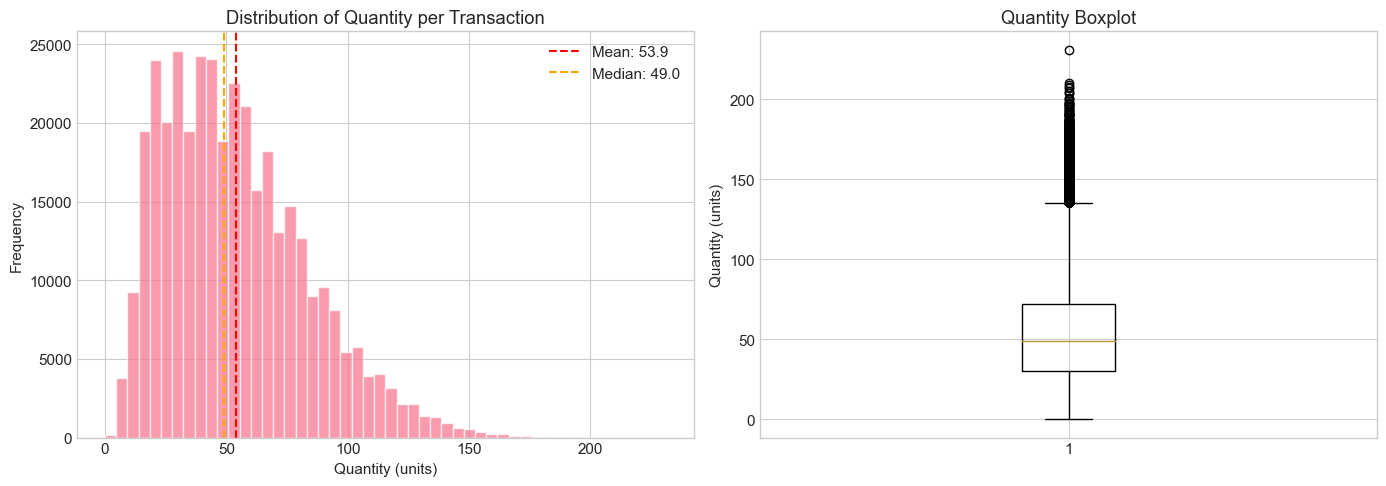

In [13]:
# Quantity distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_sales[qty_col], bins=50, edgecolor='white', alpha=0.7)
axes[0].set_xlabel('Quantity (units)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Quantity per Transaction')
axes[0].axvline(df_sales[qty_col].mean(), color='red', linestyle='--', label=f'Mean: {df_sales[qty_col].mean():.1f}')
axes[0].axvline(df_sales[qty_col].median(), color='orange', linestyle='--', label=f'Median: {df_sales[qty_col].median():.1f}')
axes[0].legend()

# Boxplot
axes[1].boxplot(df_sales[qty_col], vert=True)
axes[1].set_ylabel('Quantity (units)')
axes[1].set_title('Quantity Boxplot')

plt.tight_layout()
plt.savefig('../reports/figures/quantity_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 4. Monthly Aggregation

In [14]:
# Aggregate to monthly
df_monthly = make_monthly_sales(df_sales, config)
print(f"Monthly data: {len(df_monthly)} months")
print(f"Date range: {df_monthly['year_month'].min()} to {df_monthly['year_month'].max()}")
df_monthly.head(10)

Monthly data: 60 months
Date range: 2016-01 to 2020-12


,year_month,total_revenue,total_quantity,transaction_count
0,2016-01,46886250.0,187545,6200
1,2016-02,49299000.0,197196,5800
2,2016-03,63637250.0,254549,6200
3,2016-04,70358750.0,281435,6000
4,2016-05,78636000.0,314544,6200
5,2016-06,82090500.0,328362,6000
6,2016-07,88258000.0,353032,6200
7,2016-08,79080000.0,316320,6200
8,2016-09,71041750.0,284167,6000
9,2016-10,67813250.0,271253,6200


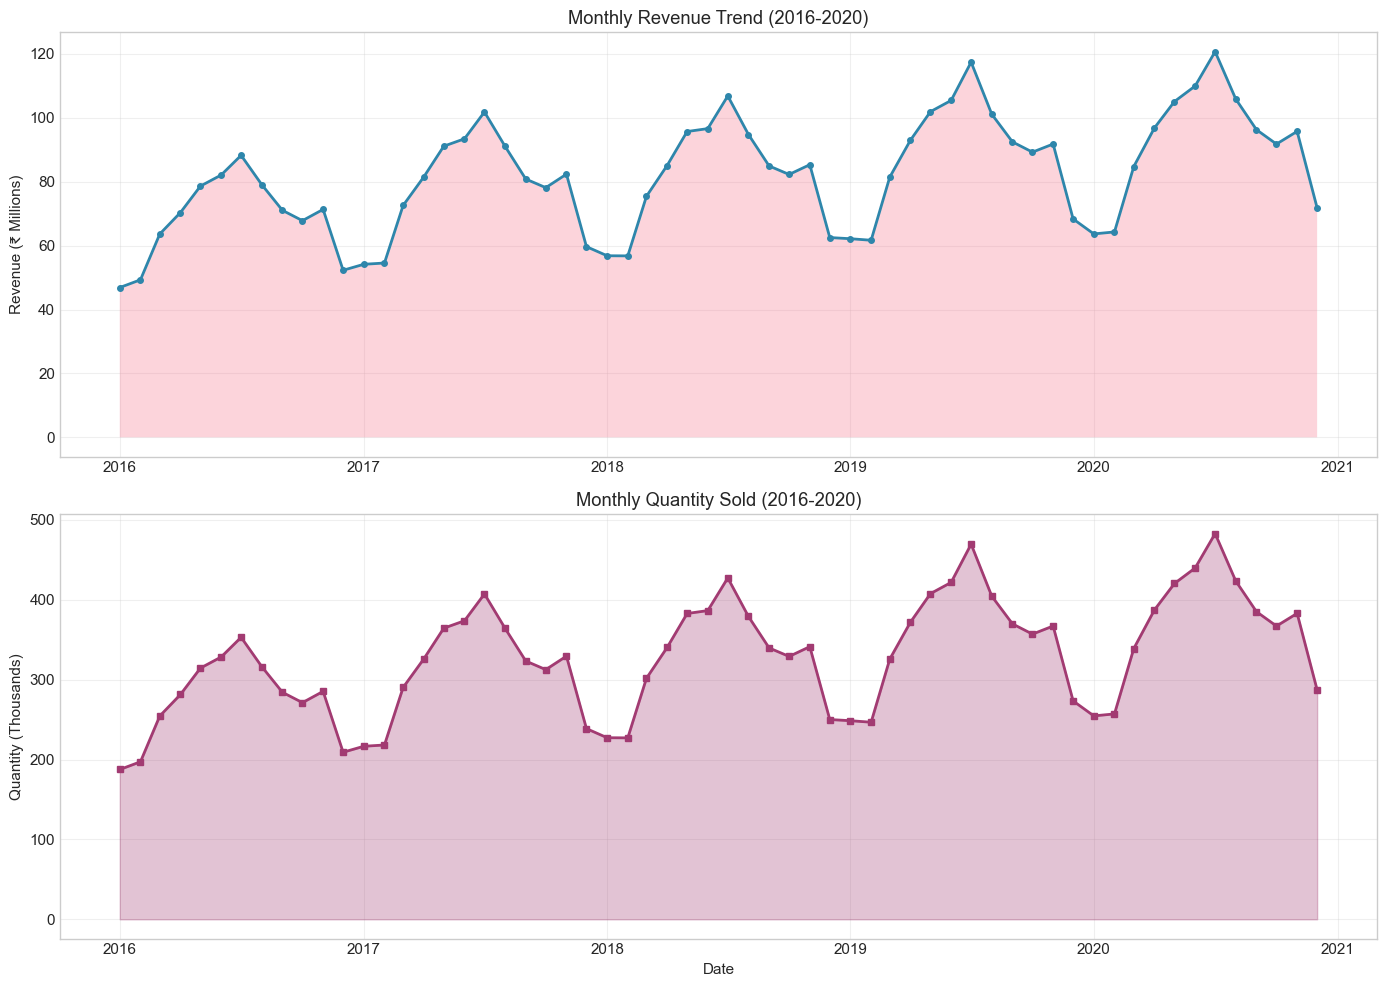

In [15]:
# Convert year_month to datetime for plotting
df_monthly['date'] = df_monthly['year_month'].dt.to_timestamp()

# Monthly revenue trend
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Revenue
axes[0].plot(df_monthly['date'], df_monthly['total_revenue'] / 1e6, 
             marker='o', linewidth=2, markersize=4, color='#2E86AB')
axes[0].fill_between(df_monthly['date'], df_monthly['total_revenue'] / 1e6, alpha=0.3)
axes[0].set_ylabel('Revenue (₹ Millions)')
axes[0].set_title('Monthly Revenue Trend (2016-2020)')
axes[0].grid(True, alpha=0.3)

# Quantity
axes[1].plot(df_monthly['date'], df_monthly['total_quantity'] / 1e3, 
             marker='s', linewidth=2, markersize=4, color='#A23B72')
axes[1].fill_between(df_monthly['date'], df_monthly['total_quantity'] / 1e3, alpha=0.3, color='#A23B72')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Quantity (Thousands)')
axes[1].set_title('Monthly Quantity Sold (2016-2020)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/monthly_revenue_quantity_trend.png', dpi=150, bbox_inches='tight')
plt.show()

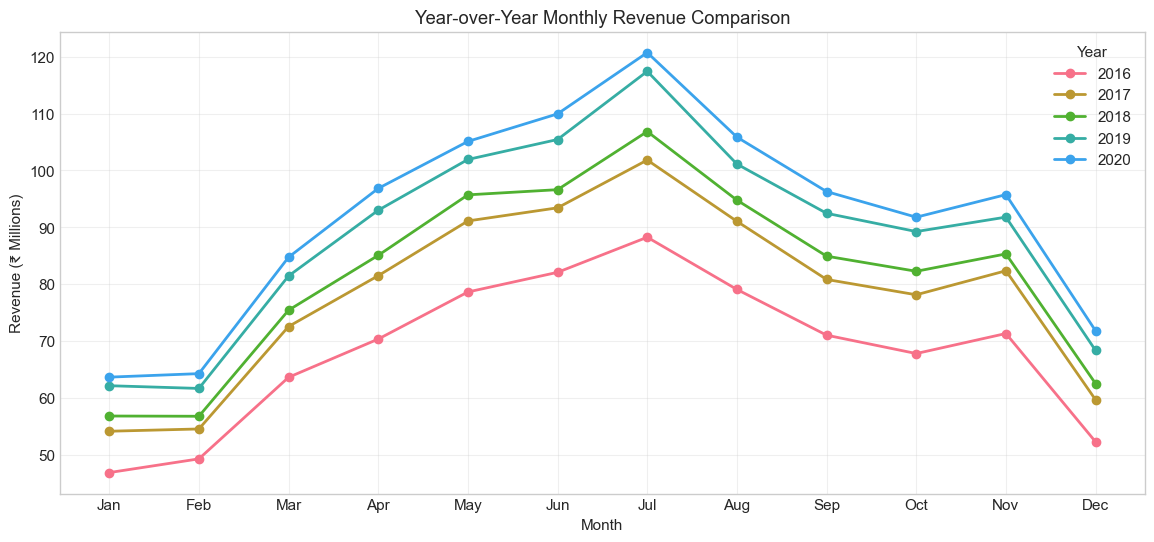

In [16]:
# Year-over-Year comparison
df_monthly['year'] = df_monthly['year_month'].dt.year
df_monthly['month'] = df_monthly['year_month'].dt.month

plt.figure(figsize=(14, 6))
for year in sorted(df_monthly['year'].unique()):
    yearly = df_monthly[df_monthly['year'] == year]
    plt.plot(yearly['month'], yearly['total_revenue'] / 1e6, 
             marker='o', label=str(year), linewidth=2)

plt.xlabel('Month')
plt.ylabel('Revenue (₹ Millions)')
plt.title('Year-over-Year Monthly Revenue Comparison')
plt.legend(title='Year')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3)
plt.savefig('../reports/figures/yoy_revenue_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

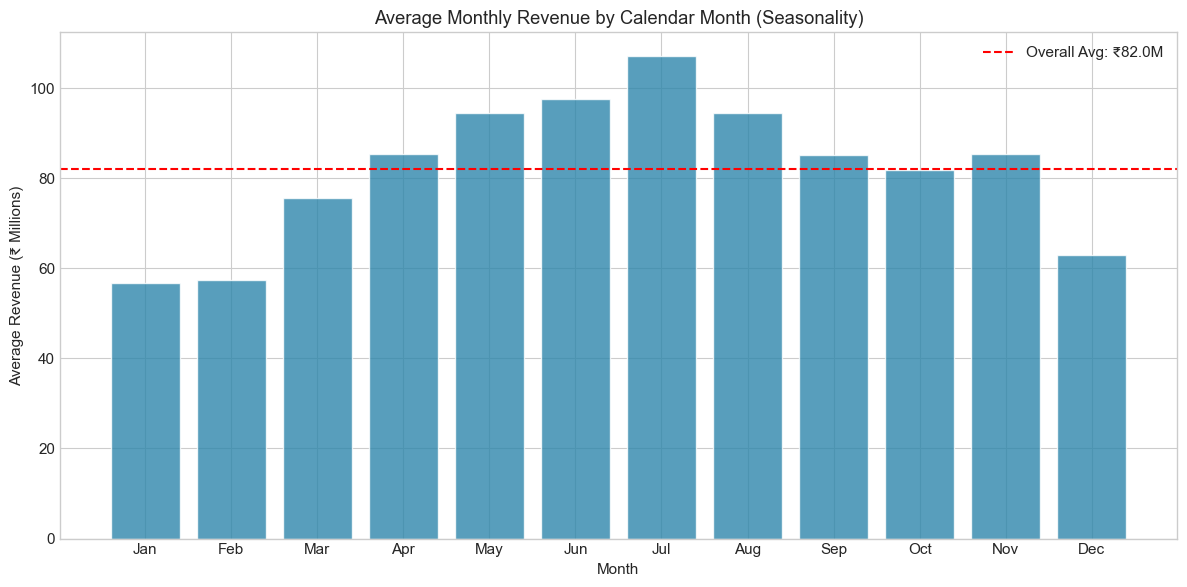

In [17]:
# Seasonality - average by month
monthly_avg = df_monthly.groupby('month').agg({
    'total_revenue': 'mean',
    'total_quantity': 'mean'
}).reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(monthly_avg['month'], monthly_avg['total_revenue'] / 1e6, 
              color='#2E86AB', edgecolor='white', alpha=0.8)
ax.set_xlabel('Month')
ax.set_ylabel('Average Revenue (₹ Millions)')
ax.set_title('Average Monthly Revenue by Calendar Month (Seasonality)')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Highlight peak months
avg_rev = monthly_avg['total_revenue'].mean()
ax.axhline(avg_rev / 1e6, color='red', linestyle='--', label=f'Overall Avg: ₹{avg_rev/1e6:.1f}M')
ax.legend()

plt.tight_layout()
plt.savefig('../reports/figures/seasonality_pattern.png', dpi=150, bbox_inches='tight')
plt.show()

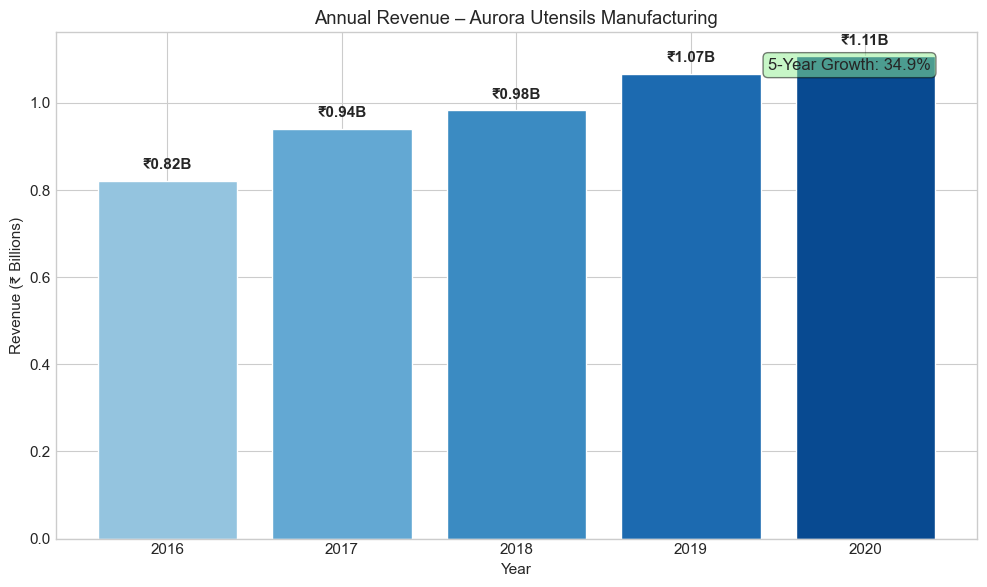


=== ANNUAL TOTALS ===
   year  Revenue (₹B)  Quantity (M)
0  2016          0.82          3.28
1  2017          0.94          3.76
2  2018          0.98          3.93
3  2019          1.07          4.26
4  2020          1.11          4.43


In [18]:
# Annual totals bar chart - great for presentations
annual = df_monthly.groupby('year').agg(
    total_revenue=('total_revenue', 'sum'),
    total_quantity=('total_quantity', 'sum')
).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(annual)))
bars = ax.bar(annual['year'], annual['total_revenue'] / 1e9, color=colors, edgecolor='white')
ax.set_xlabel('Year')
ax.set_ylabel('Revenue (₹ Billions)')
ax.set_title('Annual Revenue – Aurora Utensils Manufacturing')

# Add value labels on bars
for bar, val in zip(bars, annual['total_revenue'] / 1e9):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'₹{val:.2f}B', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add growth annotation
growth_pct = ((annual['total_revenue'].iloc[-1] / annual['total_revenue'].iloc[0]) - 1) * 100
ax.annotate(f'5-Year Growth: {growth_pct:.1f}%', 
            xy=(0.95, 0.95), xycoords='axes fraction',
            ha='right', va='top', fontsize=12,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.savefig('../reports/figures/annual_revenue.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n=== ANNUAL TOTALS ===")
annual['Revenue (₹B)'] = (annual['total_revenue'] / 1e9).round(2)
annual['Quantity (M)'] = (annual['total_quantity'] / 1e6).round(2)
print(annual[['year', 'Revenue (₹B)', 'Quantity (M)']])

---
## 5. Top Products and Regions

In [19]:
# Top 10 products by revenue
product_col = config['columns']['sales']['product']
revenue_col = config['columns']['sales']['revenue']

top_products = df_sales.groupby(product_col).agg({
    revenue_col: 'sum',
    'sales': 'sum'
}).sort_values(revenue_col, ascending=False).head(10)
top_products.columns = ['Total Revenue', 'Total Quantity']

print(f"=== TOP {len(top_products)} PRODUCTS BY REVENUE ===")
top_products['Revenue (₹M)'] = (top_products['Total Revenue'] / 1e6).round(2)
print(top_products[['Revenue (₹M)', 'Total Quantity']])

=== TOP 10 PRODUCTS BY REVENUE ===
            Revenue (₹M)  Total Quantity
Model Name                              
Oreo_3            401.87         1607495
Oreo_1            384.91         1539635
Platinum          384.72         1538899
Cheerio_K         351.29         1405141
Kitkat_1          334.29         1337165
Kitkat_2          318.00         1271981
Kitkat_3          317.89         1271556
Oreo_2            267.89         1071563
Hulu_2            267.40         1069587
Cheerio_J         267.20         1068802


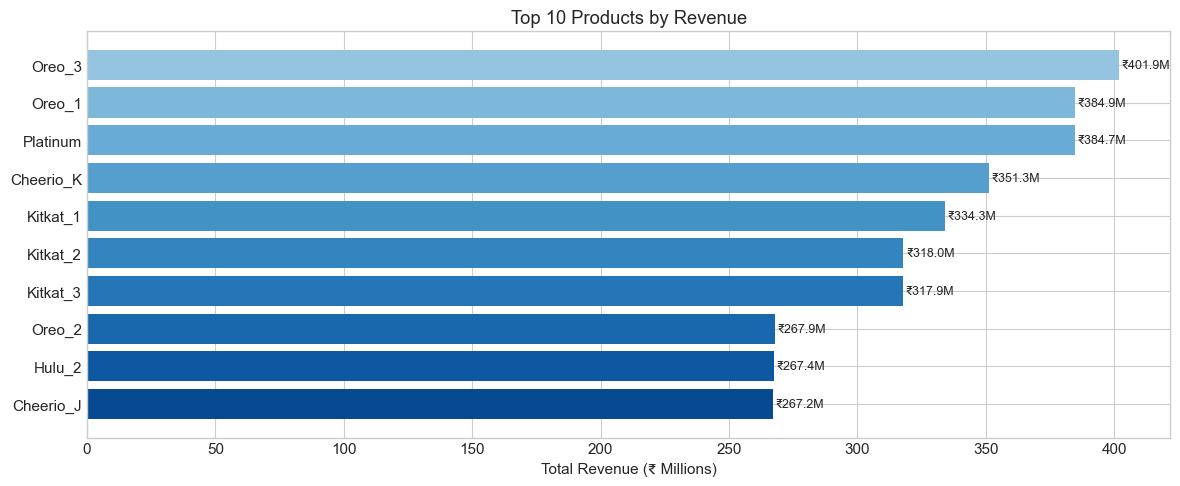

In [20]:
# Top products bar chart
n_products = len(top_products)
fig, ax = plt.subplots(figsize=(12, max(4, n_products * 0.5)))
colors = plt.cm.Blues(np.linspace(0.4, 0.9, n_products))
bars = ax.barh(range(n_products), top_products['Total Revenue'] / 1e6, color=colors)
ax.set_yticks(range(n_products))
ax.set_yticklabels(top_products.index)
ax.set_xlabel('Total Revenue (₹ Millions)')
ax.set_title(f'Top {n_products} Products by Revenue')
ax.invert_yaxis()

# Add value labels
for bar, val in zip(bars, top_products['Total Revenue'] / 1e6):
    ax.text(val + 1, bar.get_y() + bar.get_height()/2, f'₹{val:.1f}M', 
            va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../reports/figures/top_products.png', dpi=150, bbox_inches='tight')
plt.show()

In [21]:
# Top states by revenue
region_col = config['columns']['sales']['region_or_customer']

top_states = df_sales.groupby(region_col).agg({
    revenue_col: 'sum',
    'sales': 'sum'
}).sort_values(revenue_col, ascending=False).head(10)
top_states.columns = ['Total Revenue', 'Total Quantity']

print(f"=== TOP {len(top_states)} STATES BY REVENUE ===")
top_states['Revenue (₹M)'] = (top_states['Total Revenue'] / 1e6).round(2)
print(top_states[['Revenue (₹M)', 'Total Quantity']])

=== TOP 1 STATES BY REVENUE ===
             Revenue (₹M)  Total Quantity
State                                    
Maharashtra       4917.99        19671948


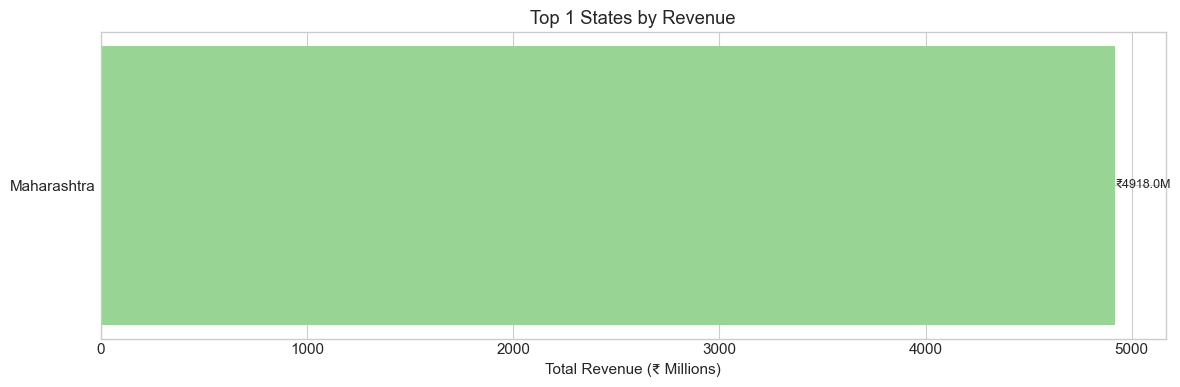

In [22]:
# States bar chart
n_states = len(top_states)
fig, ax = plt.subplots(figsize=(12, max(4, n_states * 0.5)))
colors = plt.cm.Greens(np.linspace(0.4, 0.9, n_states))
bars = ax.barh(range(n_states), top_states['Total Revenue'] / 1e6, color=colors)
ax.set_yticks(range(n_states))
ax.set_yticklabels(top_states.index)
ax.set_xlabel('Total Revenue (₹ Millions)')
ax.set_title(f'Top {n_states} States by Revenue')
ax.invert_yaxis()

# Add value labels
for bar, val in zip(bars, top_states['Total Revenue'] / 1e6):
    ax.text(val + 1, bar.get_y() + bar.get_height()/2, f'₹{val:.1f}M', 
            va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../reports/figures/top_states.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 6. Summary Statistics

In [23]:
# Summary statistics
print("="*60)
print("AURORA UTENSILS MANUFACTURING - SALES DATA SUMMARY")
print("="*60)
print(f"\nData Coverage:")
print(f"  - Period: {df_monthly['year_month'].min()} to {df_monthly['year_month'].max()}")
print(f"  - Total months: {len(df_monthly)}")
print(f"  - Total transactions: {len(df_sales):,}")

print(f"\nRevenue Summary:")
print(f"  - Total revenue: ₹{df_monthly['total_revenue'].sum()/1e9:.2f}B")
print(f"  - Monthly avg: ₹{df_monthly['total_revenue'].mean()/1e6:.2f}M")
print(f"  - Monthly std: ₹{df_monthly['total_revenue'].std()/1e6:.2f}M")
print(f"  - Min month: ₹{df_monthly['total_revenue'].min()/1e6:.2f}M")
print(f"  - Max month: ₹{df_monthly['total_revenue'].max()/1e6:.2f}M")

print(f"\nQuantity Summary:")
print(f"  - Total units sold: {df_monthly['total_quantity'].sum():,.0f}")
print(f"  - Monthly avg: {df_monthly['total_quantity'].mean():,.0f} units")

print(f"\nProduct & Region Diversity:")
print(f"  - Unique products: {df_sales[product_col].nunique()}")
print(f"  - Unique states: {df_sales[region_col].nunique()}")
print(f"  - Unique stores: {df_sales['Store Code'].nunique()}")
print("="*60)

AURORA UTENSILS MANUFACTURING - SALES DATA SUMMARY

Data Coverage:
  - Period: 2016-01 to 2020-12
  - Total months: 60
  - Total transactions: 365,220

Revenue Summary:
  - Total revenue: ₹4.92B
  - Monthly avg: ₹81.97M
  - Monthly std: ₹17.79M
  - Min month: ₹46.89M
  - Max month: ₹120.72M

Quantity Summary:
  - Total units sold: 19,671,948
  - Monthly avg: 327,866 units

Product & Region Diversity:
  - Unique products: 20
  - Unique states: 1
  - Unique stores: 10


---
## 7. Observations & Notes

### Key Findings

1. **Data Quality**: 
   - Clean dataset with no missing values
   - 5 years of continuous transaction data (2016-2020) aggregated to monthly
   - ~365K transactions

2. **Revenue Patterns**:
   - Clear seasonal pattern visible in monthly data
   - Peak months appear to be mid-year (May-August)
   - Year-over-year growth visible in annual totals

3. **Product Concentration**:
   - Multiple product types (Model Names)
   - Top 10 products likely drive majority of revenue (Pareto effect)

4. **Geographic Distribution**:
   - Sales across multiple states in India
   - Concentration in key markets

### Revenue Derivation Assumption

Since the dataset contains **quantity (units sold)** but not explicit revenue, we derived:

```
revenue = quantity × ₹250 (assumed unit price)
```

This is documented in `config/settings.yaml`. 

**Implication**: Forecasting revenue is therefore equivalent to forecasting units sold and scaling by a constant price. There is no hidden complexity from price variation in this analysis.

### Next Steps

1. Download and explore macro data (Industrial Production Index, Manufacturing Sales)
2. Merge macro indicators with monthly sales
3. Build forecasting features (lags, rolling stats, seasonality dummies)
4. Proceed to revenue forecasting model development

In [24]:
# Save processed monthly data
os.makedirs('../data/interim', exist_ok=True)
df_monthly.to_csv('../data/interim/monthly_sales.csv', index=False)
print("✓ Monthly sales data saved to data/interim/monthly_sales.csv")

✓ Monthly sales data saved to data/interim/monthly_sales.csv
